In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("abalone.csv")

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Target column has integar value means model has regression problem

In [4]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [7]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

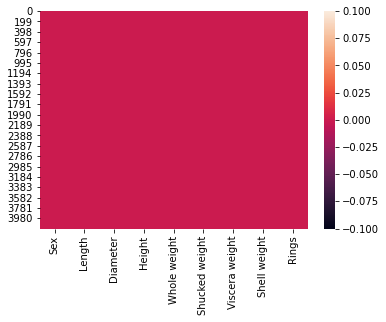

In [10]:
sns.heatmap(df.isnull())

no null value is present in the model

In [11]:
le = LabelEncoder()

In [12]:
df["Sex"]=le.fit_transform(df["Sex"])

In [13]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [14]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


sex shows least correlation with the target varaible and shell weight shows the most positive correlation with the targt column

<AxesSubplot:>

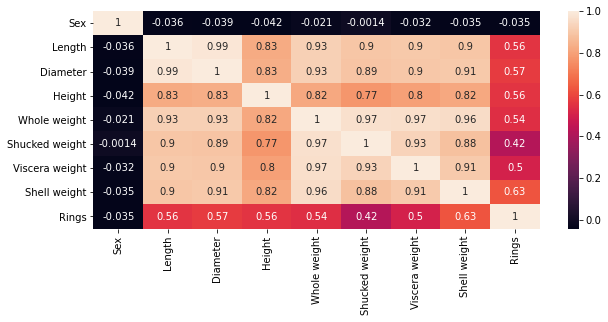

In [15]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True)

length and diameter ,whole weight and shucked weight shows the multicollinearity 

In [16]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot:xlabel='Length', ylabel='Count'>

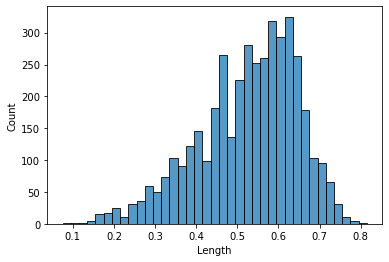

In [17]:
sns.histplot(x='Length',data = df)

<function matplotlib.pyplot.show(close=None, block=None)>

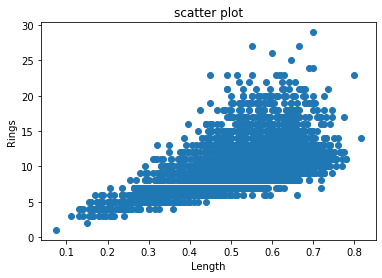

In [18]:
x= df['Length']
y= df['Rings']
plt.scatter(x,y)
plt.xlabel('Length')
plt.ylabel('Rings')
plt.title('scatter plot')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

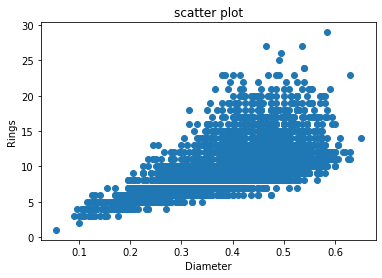

In [19]:
x= df['Diameter']
y= df['Rings']
plt.scatter(x,y)
plt.xlabel('Diameter')
plt.ylabel('Rings')
plt.title('scatter plot')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

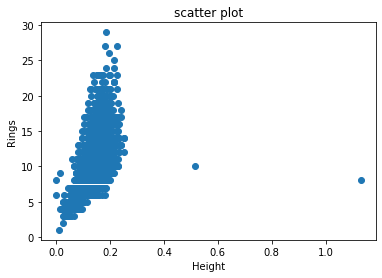

In [20]:
x= df['Height']
y= df['Rings']
plt.scatter(x,y)
plt.xlabel('Height')
plt.ylabel('Rings')
plt.title('scatter plot')
plt.show

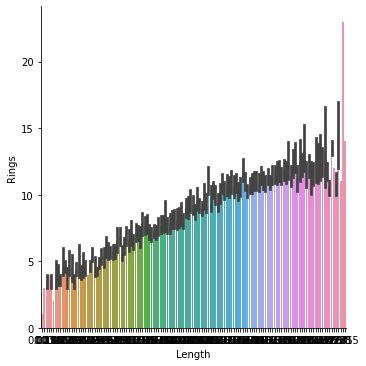

In [21]:
g=sns.catplot(x="Length",y="Rings", data =df,kind="bar")

<AxesSubplot:xlabel='Rings', ylabel='count'>

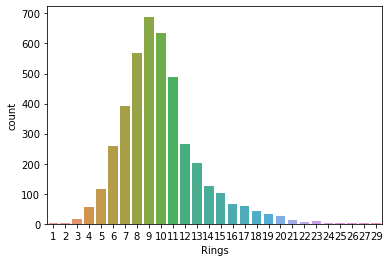

In [22]:
sns.countplot(x="Rings",data = df)

In [23]:
df.drop('Sex',axis=1,inplace = True)

In [24]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [25]:
len(df.columns)

8

Length               AxesSubplot(0.125,0.536818;0.168478x0.343182)
Diameter          AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Height            AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Whole weight      AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Shucked weight          AxesSubplot(0.125,0.125;0.168478x0.343182)
Viscera weight       AxesSubplot(0.327174,0.125;0.168478x0.343182)
Shell weight         AxesSubplot(0.529348,0.125;0.168478x0.343182)
Rings                AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

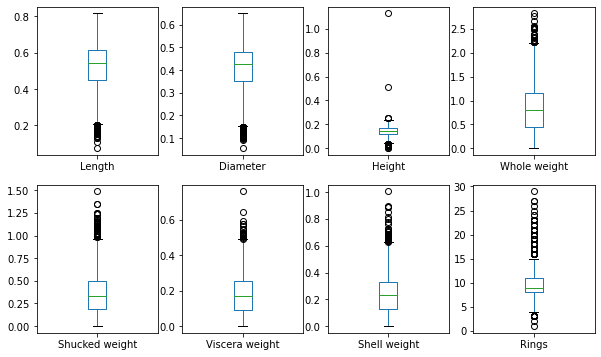

In [26]:
df.plot(kind='box',subplots=True,layout =(2,4),figsize =(10,6) )

Outliers are present in tha data set

In [27]:
df.drop(['Length','Shucked weight'],axis=1,inplace=True)

In [28]:
df.head()

,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,0.365,0.095,0.5140,0.1010,0.150,15
1,0.265,0.090,0.2255,0.0485,0.070,7
2,0.420,0.135,0.6770,0.1415,0.210,9
3,0.365,0.125,0.5160,0.1140,0.155,10
4,0.255,0.080,0.2050,0.0395,0.055,7


In [29]:
x=df.iloc[:,0:-1]

In [30]:
x.head()

,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,0.365,0.095,0.5140,0.1010,0.150
1,0.265,0.090,0.2255,0.0485,0.070
2,0.420,0.135,0.6770,0.1415,0.210
3,0.365,0.125,0.5160,0.1140,0.155
4,0.255,0.080,0.2050,0.0395,0.055


In [31]:
x.shape

(4177, 5)

In [32]:
x.shape[1]

5

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
vif= pd.DataFrame()
vif["features"]=x.columns
vif["VIF FACTOR"] =[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
print(vif)

         features  VIF FACTOR
0        Diameter   43.500320
1          Height   41.627921
2    Whole weight  123.921011
3  Viscera weight   59.015880
4    Shell weight   49.049959


In [35]:
from scipy.stats import zscore
import numpy as np

In [36]:
z = np.abs(zscore(df))
z

array([[0.43214879, 1.06442415, 0.64189823, 0.72621157, 0.63821689,
        1.57154357],
       [1.439929  , 1.18397831, 1.23027711, 1.20522124, 1.21298732,
        0.91001299],
       [0.12213032, 0.10799087, 0.30946926, 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [0.67640943, 1.56576738, 0.70821206, 0.97541324, 0.49695471,
        0.28962385],
       [0.77718745, 0.25067161, 0.54199757, 0.73362741, 0.41073914,
        0.02057072],
       [1.48263359, 1.32665906, 2.28368063, 1.78744868, 1.84048058,
        0.64095986]])

In [37]:
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  166,  166,
        167,  168,  170,  181,  232,  236,  236,  237,  238,  270,  275,
        277,  278,  294,  310,  313,  314,  334,  351,  355,  358,  358,
        362,  375,  416,  417,  428,  431,  433,  469,  478,  480,  501,
        526,  530,  572,  628,  673,  674,  675,  678,  694,  696,  719,
        720,  744,  754,  756,  811,  891,  891, 1048, 1051, 1052, 1204,
       1206, 1207, 1207, 1207, 1209, 1257, 1417, 1422, 1427, 1427, 1428,
       1429, 1757, 1759, 1762, 1762, 1763, 1763, 1987, 2051, 2090, 2108,
       2108, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209, 2274,
       2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2436, 2459,
       2471, 2623, 2624, 2624, 2709, 2710, 2810, 2811, 2811, 2863, 2863,
       3008, 3140, 3148, 3149, 3149, 3151, 3151, 3188, 3193, 3280, 3359,
       3427, 3427, 3599, 3628, 3715, 3715, 3715, 3800, 3837, 3899, 3924,
       3930, 3944, 3996, 4145, 4148], dtype=int64)

In [38]:
df_new = df[(z<3).all(axis = 1)]

In [39]:
df_new.head()

,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,0.365,0.095,0.5140,0.1010,0.150,15
1,0.265,0.090,0.2255,0.0485,0.070,7
2,0.420,0.135,0.6770,0.1415,0.210,9
3,0.365,0.125,0.5160,0.1140,0.155,10
4,0.255,0.080,0.2050,0.0395,0.055,7


In [40]:
df_new.skew()

Diameter         -0.598478
Height           -0.248237
Whole weight      0.388193
Viscera weight    0.455795
Shell weight      0.365540
Rings             0.716011
dtype: float64

In [41]:
from scipy.stats import skew

Diameter
-0.5982566844422044


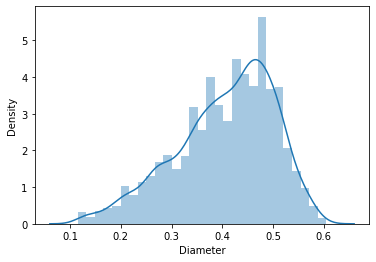

Height
-0.24814509868275617


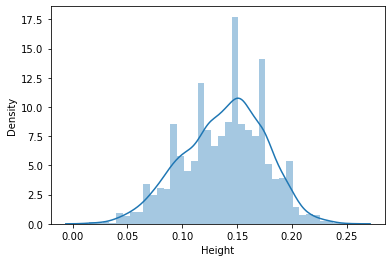

Whole weight
0.3880496867038589


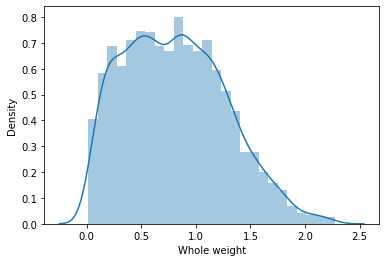

Viscera weight
0.45562576823508855


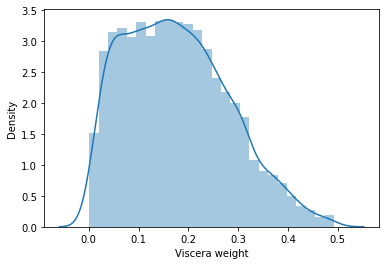

Shell weight
0.36540456876887367


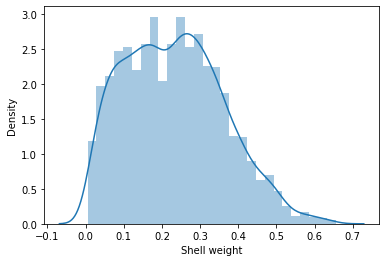

Rings
0.7157456166072506


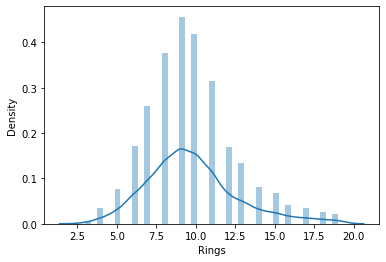

In [42]:
for i in df_new:
    print(i)
    print(skew(df_new[i]))
    plt.figure()
    sns.distplot(df_new[i])
    plt.show()

In [43]:
x= df_new.iloc[:,:-1]

In [44]:
x

,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,0.365,0.095,0.5140,0.1010,0.1500
1,0.265,0.090,0.2255,0.0485,0.0700
2,0.420,0.135,0.6770,0.1415,0.2100
3,0.365,0.125,0.5160,0.1140,0.1550
4,0.255,0.080,0.2050,0.0395,0.0550
...,...,...,...,...,...
4172,0.450,0.165,0.8870,0.2390,0.2490
4173,0.440,0.135,0.9660,0.2145,0.2605
4174,0.475,0.205,1.1760,0.2875,0.3080
4175,0.485,0.150,1.0945,0.2610,0.2960


In [45]:
y = df_new.iloc[:,-1]

In [46]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4050, dtype: int64

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.42176554, -1.16116187, -0.63340556, -0.72366849, -0.63247034],
       [-1.45625586, -1.29557866, -1.25426925, -1.22524216, -1.25071252],
       [ 0.14720414, -0.08582761, -0.28262296, -0.33674023, -0.1687887 ],
       ...,
       [ 0.71617382,  1.79600736,  0.79124525,  1.05811226,  0.58855797],
       [ 0.81962285,  0.31742274,  0.61585395,  0.80493698,  0.49582164],
       [ 1.54376608,  1.5271738 ,  2.45369653,  1.90839906,  2.03369908]])

In [49]:
x.shape

(4050, 5)

In [50]:
lr = LinearRegression()

In [51]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test= lr.predict(x_test)
    print(f"At random state{i},the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is :-{r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is :-0.45939366677719684
At random state0,the testing accuracy is :-0.43191204459735033


At random state1,the training accuracy is :-0.45429112380293457
At random state1,the testing accuracy is :-0.45221730328122534


At random state2,the training accuracy is :-0.4546237518528925
At random state2,the testing accuracy is :-0.4489413554535474


At random state3,the training accuracy is :-0.4534011480158968
At random state3,the testing accuracy is :-0.45541991239158375


At random state4,the training accuracy is :-0.45334544637349805
At random state4,the testing accuracy is :-0.4557421939591537


At random state5,the training accuracy is :-0.4601456027942966
At random state5,the testing accuracy is :-0.42659074056267543


At random state6,the training accuracy is :-0.4568836470773199
At random state6,the testing accuracy is :-0.44201733606099725


At random state7,the training accuracy is :-0.4576734163217304
At random state7,the testing accuracy is

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)

In [53]:
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
lr.score(x_train,y_train)

0.45282539172817504

In [55]:
predlr = lr.predict(x_test)

In [56]:
print(r2_score(y_test,predlr))

0.4579772530447759


In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [59]:
rf.score(x_train,y_train)

0.9256464533865592

In [60]:
predrf = rf.predict(x_test)

In [61]:
print(r2_score(y_test,predrf))

0.47608415743584975
